# **Actividad ensamble**
# **Eduardo Giraldo**

Este trabajo tiene como objetivo realizar ensambles con distintos valores para los Kmers y comparar la calidad de estos con respecto al ensamble original. 

Primero se descargo la secuencia indicada en formato fastq, se descomprimio y se translado por medio de WinSCP a la carpeta de trabajo en apolo.

Hecho esto, active el ambiente en el que instalamos fastqc, trimmomatic y abyss para realizar el ejemplo en clase.


In [ ]:
conda activate ensamble

Con el ambiente activado procedi a evaluar la calidad de la secuencia usando fastqc.

In [ ]:
fastqc Ejercicio_ensamble.fastq

Al terminarse de ejecutar fastqc obtuvimos un archivo en formato html y un archivo en formato zip, los pase hacia el pc usando WinSCP, abrimos el html y descomprimimos el archivo zip para extraer la imagen que relacionaremos a continuación. 
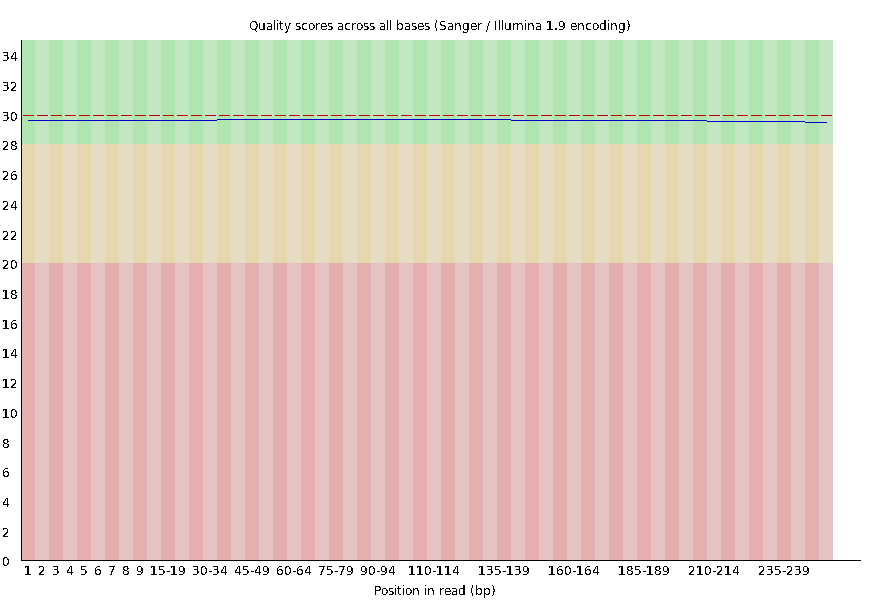

Los resultados nos indican que la secuencia tiene una calidad optima por lo que posiblemente ya fue tratada y no es muy necesario aplicarle el proceso de trimado, pero con fines de hacer el ejercicio practico completo aplicare trimado con los mismos parametros que usamos en el ejemplo en clase.

In [ ]:
trimmomatic SE -phred33 Ejercicio_ensamble.fastq Trimado_ejercicio.fastq SLIDINGWINDOW:4:20 MINLEN:25

Al terminar el trimado obtuvimos el archivo Trimado_ejercicio.fastq y pasamos a evaluar la calidad de la secuencia trimada usando fastqc nuevamente.

In [ ]:
fastqc Trimado_ejercicio.fastq

Abrimos el archivo html y se observo que 2 de las evaluaciones que hace fastqc pasaron de tener icono amarillo a tener icono verde por lo que aparentemente la calidad de la secuencia mejoro con el trimado.
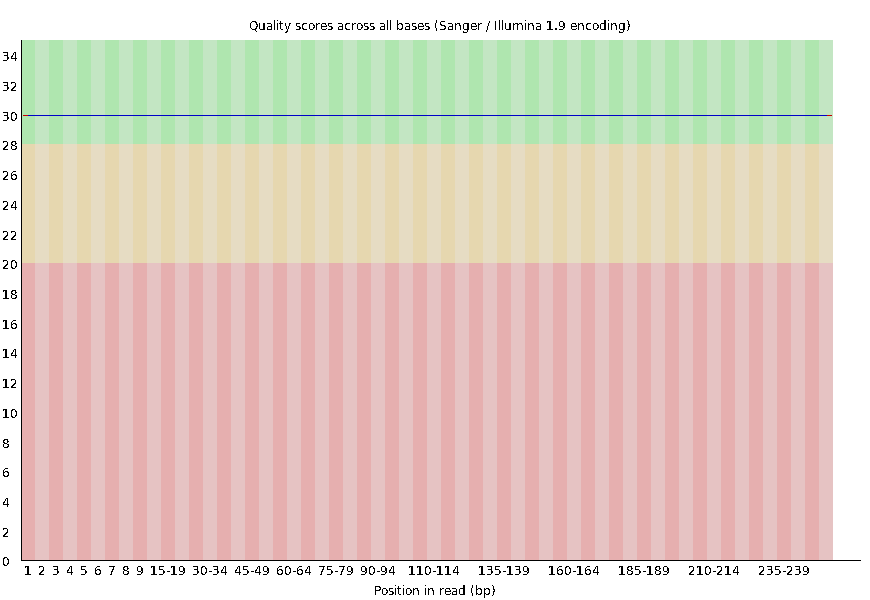

Con la comfirmación de que el trimado dio como resultado una secuencia con una calidad optima procedo a realizar el ensamble con diferentes valores para los kmers, para esto uso como base la plantilla de slurm que se nos suministro en clases y el script utilizado se mostrara en la siguiente linea de codigo.

In [ ]:
module load python/3.6.0_miniconda-4.3.11_gcc-11.2.0

source activate ensamble

abyss-pe k=10 se=Trimado_ejercicio.fastq name=Ensamble10 'unitigs'
abyss-pe k=50 se=Trimado_ejercicio.fastq name=Ensamble50 'unitigs'
abyss-pe k=100 se=Trimado_ejercicio.fastq name=Ensamble100 'unitigs'


Para el valor de los kmers utilice un valor cercano al minimo posible (10), otro intermedio (50) y un valor alto (100). 

Se utilizo el comando que se observa en las siguientes lineas de codigo para visualizar los valores del archivo .fa en una tabla.


In [ ]:
#Resultado para 10 kmers
abyss-fac Ensamble10-unitigs.fa

El ensamble con 10 kmers nos dio este resultado.
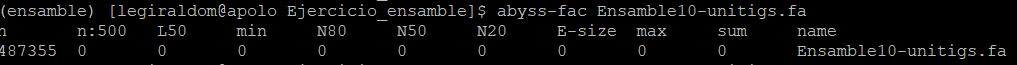

Esto nos indica que el numero de kmers fue muy bajo para poder ensamblar la secuencia. 

In [ ]:
#Resultado para 50 kmers
abyss-fac Ensamble50-unitigs.fa

El ensamble con 50 kmers nos dio este resultado.
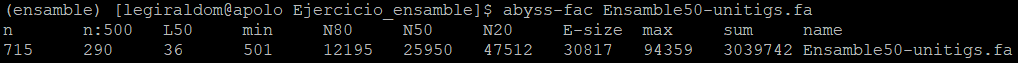
Se presenta una mejoria ya que el parametro L50 esta en 36, lo que nos indica que se ensamblo la secuencia. 

In [ ]:
#Resultado para 100 kmers
abbys-fac Ensamble100-unitigs.fa

El ensamble con 100 kmers dio este resultado.
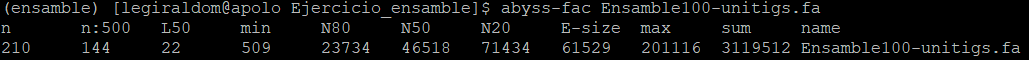

Con 100 kmers el resultado mejoro aun más ya que el parametro L50 llego a 22.

Al comparar los resultados obtenidos con el ensamble original observe que el ensamble original tiene un valor L50 de 5, un valor muchor menor al obtenido en mis ensambles.
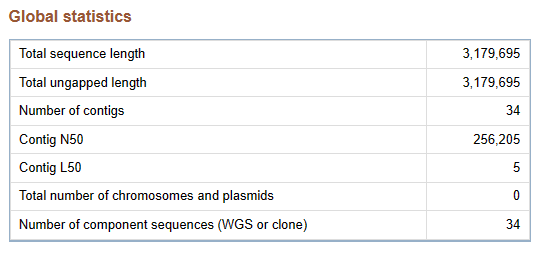

Teniendo en cuenta que el valor de L50 disminuyo con el número de kmers, procedi a acercarlo más al valor maximo posible para comprobar si se obtenia un resultado similar al del ensable original. 

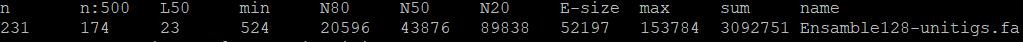


Se obtuvo un valor de L50=23 que es mayor al encontrado anteriormente y esto nos indica que aunque aparentemente la calidad de la secuencia aumento con el trimado, depurar mucho una secuencia puede ser contraproducente para el resultado del ensamble; ya que ninguno de los ensambles que obtuve tuvo un valor L50 tan bajo como 5.